In [2]:
# install packages
# pip install praw
# pip install wordcloud
# pip install vaderSentiment
# pip install seaborn

  Using cached praw-7.7.1-py3-none-any.whl (191 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
  Using cached prawcore-2.4.0-py3-none-any.whl (17 kB)

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# import libraries
import praw
import pandas as pd
import requests
import datetime as dt
import time
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
# define keys
client_id = 'tscRvGK7U2QzPrQ3k_kkpw'
client_secret = '7zr5J-4-s96RcWCqwCJI6iDliSfg4Q'
user_agent = 'vscode:sentiment-analysis-app:1.0 (by u/Wise-Archer-8475)'

In [15]:
# authenticate
reddit = praw.Reddit(
    client_id = client_id,
    client_secret = client_secret,
    user_agent = user_agent
)

In [26]:
# define function to get recent posts
def fetch_recent_posts(subreddit_name, limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.new(limit=limit)

    data = []
    for post in posts:
        try:
            # get top comment
            top_comment = post.comments[0]
            top_comment_text = top_comment.body
        except (IndexError, AttributeError):
            # for cases where there's no comments
            top_comment_text = ""

        data.append({
            'Date': pd.to_datetime(post.created_utc, unit='s'),
            'Subreddit': subreddit_name,
            'Title': post.title,
            'Text': post.selftext,
            'Top Comment': top_comment_text
        })
    
    return data

In [41]:
# define subreddit
subreddit_name = 'GenerativeAI'

# get 1000 most recent posts for GenerativeAI subreddit
recent_posts_data = fetch_recent_posts(subreddit_name)

# create df from collected data
generative_df = pd.DataFrame(recent_posts_data)

# save df to csv
csv_name = 'generative.csv'
generative_df.to_csv(csv_name, index=False)

TooManyRequests: received 429 HTTP response

In [ ]:
# do the same for the "artificial" subreddit

# specify subreddit name
subreddit_name = 'artificial'

# get recent posts
recent_posts_data = fetch_recent_posts(subreddit_name)

# create df from collected data
artificial_df = pd.DataFrame(recent_posts_data)

# save df to csv
csv_name = 'artificial.csv'
artificial_df.to_csv(csv_name, index=False)

In [6]:
# read in data from CSVs
generative_df = pd.read_csv('generative.csv')

artificial_df = pd.read_csv('artificial.csv')

In [7]:
# combine dfs and show
combined_df = pd.concat([generative_df, artificial_df], ignore_index=True)

print(len(combined_df))

combined_df.head(10)

1534


,Date,Subreddit,Title,Text,Top Comment
0,2024-06-02 18:51:45,GenerativeAI,Real-world application of GenAI,"Custom t-shirts, hoodies, hats and more can be...",NaN
1,2024-06-02 17:56:55,GenerativeAI,About me [D] #generative ai #llms #machine lea...,NaN,NaN
2,2024-06-02 14:00:05,GenerativeAI,Remade Game of Thrones - RunwayML + Midjourney +,NaN,NaN
3,2024-06-01 23:40:16,GenerativeAI,"What's the state of ""invisible watermarks"" in ...",I'm asking about this because I'm both curious...,NaN
4,2024-06-01 20:48:44,GenerativeAI,"Introducing SymbCoT, a symbolic Chain-of-Thoug...",The human mind possesses an unparalleled abili...,NaN
5,2024-06-01 13:51:25,GenerativeAI,ChatGPT for flowcharts,NaN,NaN
6,2024-06-01 12:57:47,GenerativeAI,Futuristic World Inspired by Darth Vader - 56 ...,NaN,Does anyone have the tutorial for this.
7,2024-05-31 22:40:30,GenerativeAI,ChatTTS: New open-source conversational TTS mo...,ChatTTS is a new text-to-speech model develope...,NaN
8,2024-05-31 19:41:00,GenerativeAI,How is the temperature of a model designed int...,I had a doubt while using Llms in my project. ...,"For each token, LLMs are generating the probab..."
9,2024-05-31 14:48:23,GenerativeAI,Using Generative AI Tools to Write Tests for L...,The hands-on guide guide below explore how AI ...,NaN


In [8]:
# change the date column to datetime object
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# get rid of the time
combined_df['Date'] = combined_df['Date'].dt.date

In [9]:
combined_df.head(5)

,Date,Subreddit,Title,Text,Top Comment
0,2024-06-02,GenerativeAI,Real-world application of GenAI,"Custom t-shirts, hoodies, hats and more can be...",NaN
1,2024-06-02,GenerativeAI,About me [D] #generative ai #llms #machine lea...,NaN,NaN
2,2024-06-02,GenerativeAI,Remade Game of Thrones - RunwayML + Midjourney +,NaN,NaN
3,2024-06-01,GenerativeAI,"What's the state of ""invisible watermarks"" in ...",I'm asking about this because I'm both curious...,NaN
4,2024-06-01,GenerativeAI,"Introducing SymbCoT, a symbolic Chain-of-Thoug...",The human mind possesses an unparalleled abili...,NaN


In [13]:
# convert dates to strings
start_date = pd.to_datetime('2023-09-01')
end_date = pd.to_datetime('2024-05-31')

# convert date column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# filter dates to be between 9/1/23 and 5/31/24 so there are no incomplete months
combined_df = combined_df.loc[(combined_df['Date'] >= start_date) & (combined_df['Date'] <= end_date)]

combined_df.head(5)

,Date,Subreddit,Title,Text,Top Comment
7,2024-05-31,GenerativeAI,ChatTTS: New open-source conversational TTS mo...,ChatTTS is a new text-to-speech model develope...,NaN
8,2024-05-31,GenerativeAI,How is the temperature of a model designed int...,I had a doubt while using Llms in my project. ...,"For each token, LLMs are generating the probab..."
9,2024-05-31,GenerativeAI,Using Generative AI Tools to Write Tests for L...,The hands-on guide guide below explore how AI ...,NaN
10,2024-05-31,GenerativeAI,AI's transformative impact across industries,"Today, Artificial intelligence stands as one ...",NaN
11,2024-05-31,GenerativeAI,Generative AI for Anomaly Detection,NaN,NaN


In [6]:
# DATA PREPROCESSING

# checking for duplicates
duplicates = combined_df.duplicated(subset=['Title', 'Text', 'Top Comment'])

combined_df[duplicates]

# there are 8 duplicated rows

,Date,Subreddit,Title,Text,Top Comment
47,2024-05-26,GenerativeAI,PandasAI: Generative AI for pandas dataframe,NaN,NaN
77,2024-05-21,GenerativeAI,What are GGUF LLMs explained,NaN,NaN
145,2024-05-06,GenerativeAI,DSPy: Generative AI without prompt engineering...,NaN,NaN
299,2024-04-01,GenerativeAI,Generative AI Development services|XONIQUE,Elevate your business with XONIQUE generating...,NaN
350,2024-03-16,GenerativeAI,Our Knitted Woolly Heroes [DCAVDC] Suno v3 + R...,NaN,NaN
564,2024-01-22,GenerativeAI,Controllable Deepfakes With Gaussian Avatars,NaN,NaN
621,2023-12-24,GenerativeAI,Coscientist: Meet the World's First AI Researc...,NaN,NaN
853,2023-10-01,GenerativeAI,AI API for photo realistic images,Hi am looking for an API which I can easily pl...,NaN


In [15]:
# drop duplicates
combined_df = combined_df.drop_duplicates(subset=['Title', 'Text', 'Top Comment'])

In [18]:
# change Title, Text, Top Comment columns to strings
combined_df[['Title', 'Text', 'Top Comment']] = combined_df[['Title', 'Text', 'Top Comment']].astype(str)

In [19]:
# define function to clean the text
# convert to lowercase, remove punctuation, remove special characters, tokenization, stopword removal, lemmatization
def clean_text(post):
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words('english')

    # tokenize post
    tokens = word_tokenize(post.lower())

    # remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # remove stopwords and special charas
    cleaned_tokens = [word for word in tokens if word not in stopwords_list and word.isalnum()]

    # lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]

    # join lemmatized tokens back to string
    cleaned_post = ' '.join(lemmatized_tokens)

    return cleaned_post

In [20]:
# apply function to the Title, Text, Top Comment columns
combined_df['title_cleaned'] = combined_df['Title'].apply(clean_text)
combined_df['text_cleaned'] = combined_df['Text'].apply(clean_text)
combined_df['comment_cleaned'] = combined_df['Top Comment'].apply(clean_text)

combined_df.head(5)

,Date,Subreddit,Title,Text,Top Comment,title_cleaned,text_cleaned,comment_cleaned
7,2024-05-31,GenerativeAI,ChatTTS: New open-source conversational TTS mo...,ChatTTS is a new text-to-speech model develope...,nan,chattts new conversational tt model achieving ...,chattts new model developed 2noise researcher ...,nan
8,2024-05-31,GenerativeAI,How is the temperature of a model designed int...,I had a doubt while using Llms in my project. ...,"For each token, LLMs are generating the probab...",temperature model designed internally,doubt using llm project know temperature llm m...,token llm generating probability possible toke...
9,2024-05-31,GenerativeAI,Using Generative AI Tools to Write Tests for L...,The hands-on guide guide below explore how AI ...,nan,using generative ai tool write test legacy cod...,guide guide explore ai coding assistance tool ...,nan
10,2024-05-31,GenerativeAI,AI's transformative impact across industries,"Today, Artificial intelligence stands as one ...",nan,ai transformative impact across industry,today artificial intelligence stand one crucia...,nan
11,2024-05-31,GenerativeAI,Generative AI for Anomaly Detection,nan,nan,generative ai anomaly detection,nan,nan


In [21]:
# drop original columns
clean_df = combined_df.drop(columns=['Title', 'Text', 'Top Comment'])
clean_df.head(5)

,Date,Subreddit,title_cleaned,text_cleaned,comment_cleaned
7,2024-05-31,GenerativeAI,chattts new conversational tt model achieving ...,chattts new model developed 2noise researcher ...,nan
8,2024-05-31,GenerativeAI,temperature model designed internally,doubt using llm project know temperature llm m...,token llm generating probability possible toke...
9,2024-05-31,GenerativeAI,using generative ai tool write test legacy cod...,guide guide explore ai coding assistance tool ...,nan
10,2024-05-31,GenerativeAI,ai transformative impact across industry,today artificial intelligence stand one crucia...,nan
11,2024-05-31,GenerativeAI,generative ai anomaly detection,nan,nan


In [52]:
# group data by month-year and count occurences
post_counts = clean_df.groupby(pd.Grouper(key='Date', freq='M')).size().reset_index()
post_counts.columns = ['Date', 'Count']

/var/folders/b2/q5n76n9d30vc2gw47421z9lh0000gn/T/ipykernel_62358/3700998410.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  post_counts = clean_df.groupby(pd.Grouper(key='Date', freq='M')).size().reset_index()


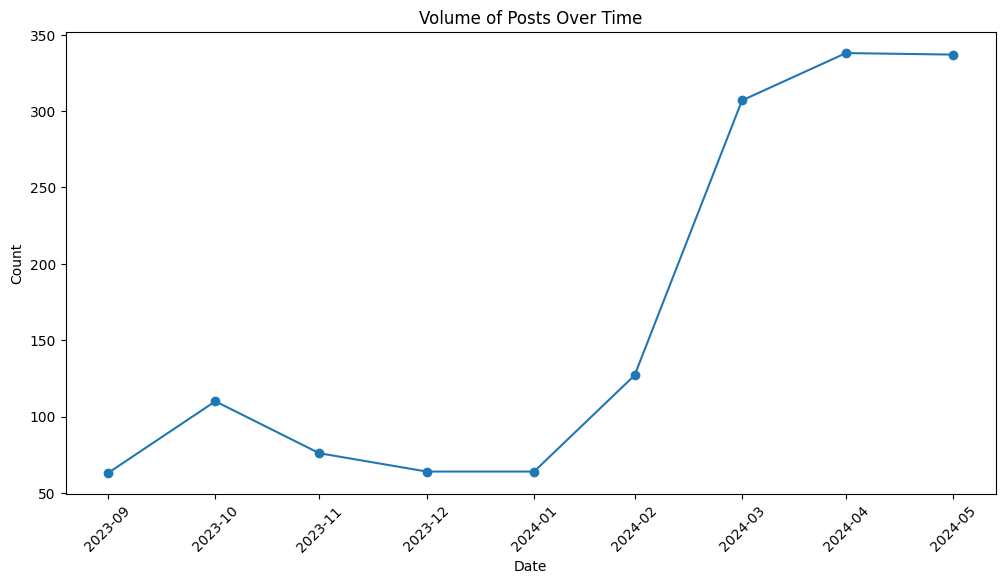

In [53]:
# plot line chart showing 
plt.figure(figsize=(12, 6))
plt.plot(post_counts['Date'], post_counts['Count'], marker='o')
plt.xticks(post_counts['Date'], post_counts['Date'].dt.strftime('%Y-%m'), rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Volume of Posts Over Time')
plt.show()

In [25]:
# create function to get sentiment scores
def get_sentiment(post):
    # check for na first
    if post == 'nan':
        return 'nan'
    
    # create sentimentintensityanalyzer object
    analyzer = SentimentIntensityAnalyzer()

    # analyze the text
    score = analyzer.polarity_scores(post)['compound']

    # classify the score
    if score >= 0.05:
        sentiment  = 'positive'
    elif score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return sentiment

In [26]:
# apply get_sentiment function to preprocessed text
clean_df['title_sentiment'] = clean_df['title_cleaned'].apply(get_sentiment)
clean_df['text_sentiment'] = clean_df['text_cleaned'].apply(get_sentiment)
clean_df['comment_sentiment'] = clean_df['comment_cleaned'].apply(get_sentiment)

In [57]:
clean_df.head(5)

,Date,Subreddit,title_cleaned,text_cleaned,comment_cleaned,title_sentiment,text_sentiment,comment_sentiment
7,2024-05-31,GenerativeAI,chattts new conversational tt model achieving ...,chattts new model developed 2noise researcher ...,nan,positive,positive,nan
8,2024-05-31,GenerativeAI,temperature model designed internally,doubt using llm project know temperature llm m...,token llm generating probability possible toke...,neutral,negative,positive
9,2024-05-31,GenerativeAI,using generative ai tool write test legacy cod...,guide guide explore ai coding assistance tool ...,nan,neutral,positive,nan
10,2024-05-31,GenerativeAI,ai transformative impact across industry,today artificial intelligence stand one crucia...,nan,neutral,positive,nan
11,2024-05-31,GenerativeAI,generative ai anomaly detection,nan,nan,neutral,nan,nan


In [28]:
# drop preprocessed text
sentiment_df = clean_df.drop(['title_cleaned', 'text_cleaned', 'comment_cleaned'], axis=1)

,Date,Subreddit,title_sentiment,text_sentiment,comment_sentiment
7,2024-05-31,GenerativeAI,positive,positive,nan
8,2024-05-31,GenerativeAI,neutral,negative,positive
9,2024-05-31,GenerativeAI,neutral,positive,nan
10,2024-05-31,GenerativeAI,neutral,positive,nan
11,2024-05-31,GenerativeAI,neutral,nan,nan


In [29]:
sentiment_df.dtypes

Date                 datetime64[ns]
Subreddit                    object
title_sentiment              object
text_sentiment               object
comment_sentiment            object
dtype: object

In [30]:
# add year month column
sentiment_df['year_month'] = sentiment_df['Date'].dt.to_period('M')

sentiment_df.head(5)

,Date,Subreddit,title_sentiment,text_sentiment,comment_sentiment,year_month
7,2024-05-31,GenerativeAI,positive,positive,nan,2024-05
8,2024-05-31,GenerativeAI,neutral,negative,positive,2024-05
9,2024-05-31,GenerativeAI,neutral,positive,nan,2024-05
10,2024-05-31,GenerativeAI,neutral,positive,nan,2024-05
11,2024-05-31,GenerativeAI,neutral,nan,nan,2024-05


In [41]:
melted_df.head(5)

,year_month,column,sentiment
0,2024-05,title_sentiment,positive
1,2024-05,title_sentiment,neutral
2,2024-05,title_sentiment,neutral
3,2024-05,title_sentiment,neutral
4,2024-05,title_sentiment,neutral


In [42]:
# reshape data to have year_month, category of sentiment, and sentiment columns
melted_df = sentiment_df.melt(id_vars=['year_month'], value_vars=['title_sentiment', 'text_sentiment', 'comment_sentiment'],
                    var_name='column', value_name='sentiment')

# make sentiment column categorical data type
melted_df['sentiment'] = pd.Categorical(melted_df['sentiment'], categories=['positive', 'negative', 'neutral'])

In [47]:
# change year_month to datetime object
melted_df['year_month'] = melted_df['year_month'].dt.to_timestamp()

/var/folders/b2/q5n76n9d30vc2gw47421z9lh0000gn/T/ipykernel_62358/351028986.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_counts = melted_df[melted_df['column'] == 'title_sentiment'].groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

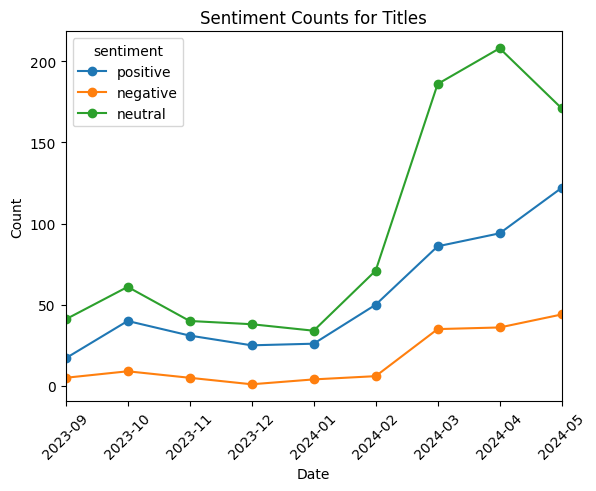

/var/folders/b2/q5n76n9d30vc2gw47421z9lh0000gn/T/ipykernel_62358/351028986.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  text_counts = melted_df[melted_df['column'] == 'text_sentiment'].groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

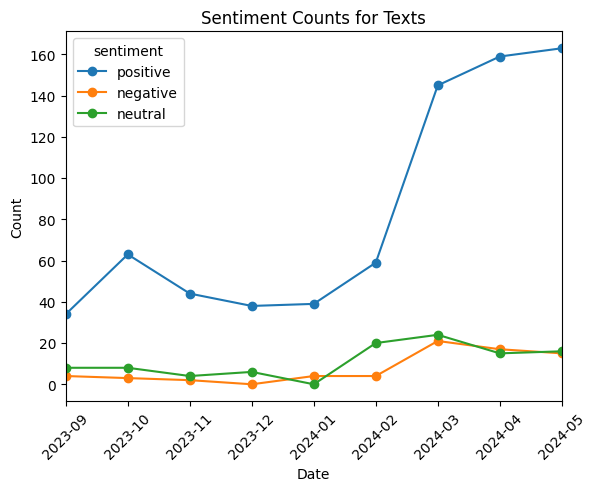

/var/folders/b2/q5n76n9d30vc2gw47421z9lh0000gn/T/ipykernel_62358/351028986.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comment_counts = melted_df[melted_df['column'] == 'comment_sentiment'].groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

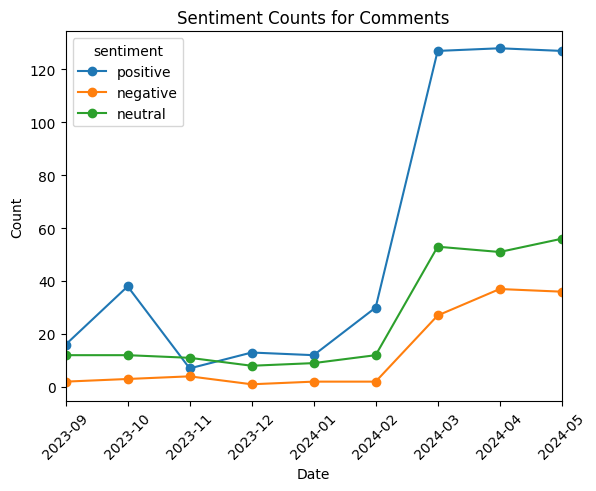

In [49]:
# create plots showing the distribution of sentiments over time
# plot sentiment counts for titles
title_counts = melted_df[melted_df['column'] == 'title_sentiment'].groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
title_counts.plot(kind='line', marker='o')
plt.title('Sentiment Counts for Titles')
plt.xlabel('Date')
plt.xticks(comment_counts.index, comment_counts.index.strftime('%Y-%m'), rotation=45)
plt.ylabel('Count')
plt.show()

# plot sentiment counts for texts
text_counts = melted_df[melted_df['column'] == 'text_sentiment'].groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
text_counts.plot(kind='line', marker='o')
plt.title('Sentiment Counts for Texts')
plt.xlabel('Date')
plt.xticks(comment_counts.index, comment_counts.index.strftime('%Y-%m'), rotation=45)
plt.ylabel('Count')
plt.show()

# plot sentiment counts for comments
comment_counts = melted_df[melted_df['column'] == 'comment_sentiment'].groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
comment_counts.plot(kind='line', marker='o')
plt.title('Sentiment Counts for Comments')
plt.xlabel('Date')
plt.xticks(comment_counts.index, comment_counts.index.strftime('%Y-%m'), rotation=45)
plt.ylabel('Count')
plt.show()

In [ ]:
# create function to concatenate text based on sentiment
def get_text_by_sentiment(df, sentiment):
    title_texts = df.loc[df['title_sentiment'] == sentiment, 'title_cleaned'].fillna('').astype(str)
    text_texts = df.loc[df['text_sentiment'] == sentiment, 'text_cleaned'].fillna('').astype(str)
    comment_texts = df.loc[df['comment_sentiment'] == sentiment, 'comment_cleaned'].fillna('').astype(str)
    
    # combine texts into series then join
    combined_texts = pd.concat([title_texts, text_texts, comment_texts])
    text = ' '.join(combined_texts)
    return text

# get text for positive sentiments
positive_text = get_text_by_sentiment(clean_df, 'positive')

# get text for negative sentiments
negative_text = get_text_by_sentiment(clean_df, 'negative')

# word cloud for positive sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# word cloud for negative sentiments
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

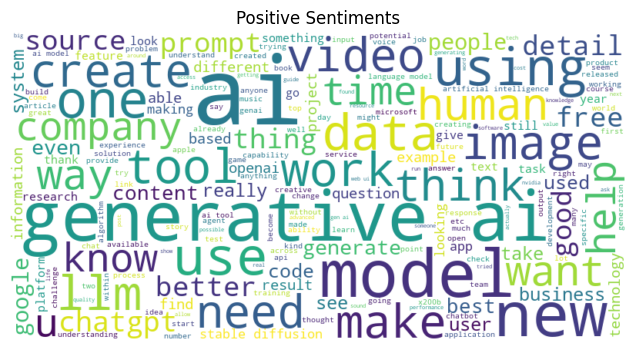

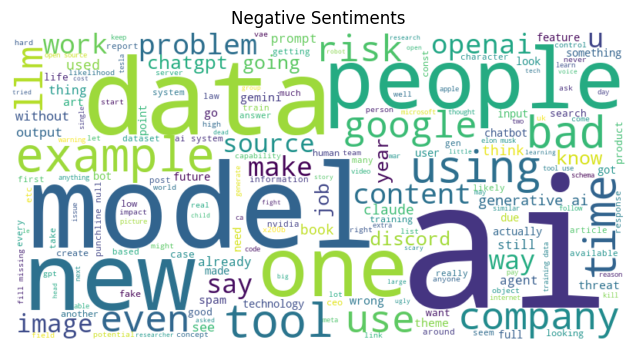

In [61]:
# show positive word cloud
plt.figure(figsize=(8, 4))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiments')
plt.show()

# show negative word cloud
plt.figure(figsize=(8, 4))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiments')
plt.show()